## Table of Contents

* [1. Introduction](#intro)

* [2: Exploratory data analysis](#task1)
    * [2.1 Understanding data](#variables)
    * [2.2 Data cleaning](#cleaning)
    * [2.3 Exploring data](#pictures)
    * [2.4 Visualising data](#question)
    
* [3. Important Points](#insights)

## 1. Introduction
<a id="intro" ></a>

The importance of employee churn cannot be overstated. Companies invest a significant amount of resources, money, and valuable time in training their employees in order to get the best outcomes, thus when an employee leaves for any reason, it is a significant loss of human resource for the firm. As a result, organisations must understand why employees depart in order to enhance productivity and reduce training costs, resulting in increased profit.

In this notebook, we will use the dataset consists of employee information and try to address two core questions, which are:

- **Understand what factors contribute most to employee attrition.**
- **Build a model that can predict if a certain employee will leave the company or not** (covered in the "model_building" notebook)

Addressing these two questions will help the company to identity the main cause for employee churn. Prediction model in the "model_building" notebook will guide us to prevent the next employee from leaving the company. Please refer to table of contents to see the structure of this notebook.

## 2: Exploratory data analysis

<a id="task1" ></a>

We wil import necessary libraries, and perform some Exploratory data analysis (EDA) steps.
EDA is the process of figuring out what the data can tell us and can be used to find patterns, relationships, or anomalies to inform our subsequent analysis. There are endless ways to perform EDA, and we will explore some of them using the seaborn and matplotlib libraries.

#### Import all required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats


from sklearn.cluster import KMeans

%matplotlib inline
sns.set(style="whitegrid")

seed = 100

#### Load data and name it as 'employee'

In [2]:
#laod data
employee = pd.read_csv('HR_comma_sep__281_29__281_29.csv')

# first five rows
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Each row is dedicated for a different employee.**

In [3]:
#rename columns for easy understanding
employee = employee.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'numberProject',
                        'average_montly_hours': 'averageMonthlyHrs',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion5yrs',
                        'sales' : 'department',
                        'left' : 'turnover'})

#rearrange columns
employee = employee[['satisfaction', 'evaluation','numberProject',
                    'averageMonthlyHrs','yearsAtCompany',
                     'workAccident', 'promotion5yrs',
                     'department', 'salary', 'turnover']]


### 2.1 Understanding data

<a id="variables"></a>

#### Attribute Information <br>
* **satisfaction_level:** Employee satisfaction rating, ranging from 0 to 1, with 1 indicating the highest satisfaction level 
* **last_evaluation:** Employee performance evaluation rating, ranging from 0 to 1, with 1 indicating a the highest performance level
* **average_monthly_hours:** The average number of hours worked each month
* **time_spend_company:** The number of years spent at the company
* **number_project:** Number of projects assigned with
* **Work_accident:** Whether or not the employee was involved in a workplace accident. “1” indicates that they were, “0” indicates that they were not
* **promotion_last_5years:** Whether or not the employee has been promoted at least once in the past five years. “1” indicates that they were, “0” indicates that they were not
* **department:** The department the employee is working in
* **salary:** The salary classification of the employee, ranging across “low”, “medium”, and “high”
* **left:** Whether or not the employee has left the company


In [4]:
#shape of the employee_data
print(f'The dataset consists of {employee.shape[0]} rows and {employee.shape[1]} columns.')

The dataset consists of 14999 rows and 10 columns.


In [5]:
#feature names
employee.columns

Index(['satisfaction', 'evaluation', 'numberProject', 'averageMonthlyHrs',
       'yearsAtCompany', 'workAccident', 'promotion5yrs', 'department',
       'salary', 'turnover'],
      dtype='object')

In [6]:
#data type of each attribute
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   satisfaction       14999 non-null  float64
 1   evaluation         14999 non-null  float64
 2   numberProject      14999 non-null  int64  
 3   averageMonthlyHrs  14999 non-null  int64  
 4   yearsAtCompany     14999 non-null  int64  
 5   workAccident       14999 non-null  int64  
 6   promotion5yrs      14999 non-null  int64  
 7   department         14999 non-null  object 
 8   salary             14999 non-null  object 
 9   turnover           14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* There are eight attributes which are numeric.
* Only sales and salary atributes are categorical data.
* We must convert this categorical data into nominal data for us to evaluate it, we do that using LabelEncoder (**which is covered in the model_building notebook**).

In [7]:
#unique department attribute
employee.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
#unique salary attribute
employee.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

**What is the difference between attrition and retention?** A retention rate is the percentage of employees your business has retained over a specified time period. An attrition rate looks at the exact opposite or retention. The attrition rate shows the percentage of employees you lost and did not replace.<br>

**ATTRITION RATE (%) = (Number of leaves ÷ number of employees) x 100**


Reference: https://www.betterteam.com/what-is-attrition#:~:text=What%20is%20the%20difference%20between%20attrition%20and%20retention%3F,lost%20and%20did%20not%20replace.

In [9]:
employee.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

From the above calculation, the number of employees who have left the job is 3571 and the other value indicates who have not left the job.

In [10]:
#Statistics summary
employee.describe()

,satisfaction,evaluation,numberProject,averageMonthlyHrs,yearsAtCompany,workAccident,promotion5yrs,turnover
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


From the above table, we can see that there are some characteristics change among the features. Some are listed below:

- About 24% of the employees have left the company (attrition rate).
- Averages of satisfaction level and last evaluation scores are about 61% and 72% respectively. 
- An average employee worked almost 3.5 years.
- Unfortunately only 2.1% of employees were promoted in the last five years.
- An average of 3-4 different projects per year are taken by employee.
- In average, about 202 hours are spent by employee per month.

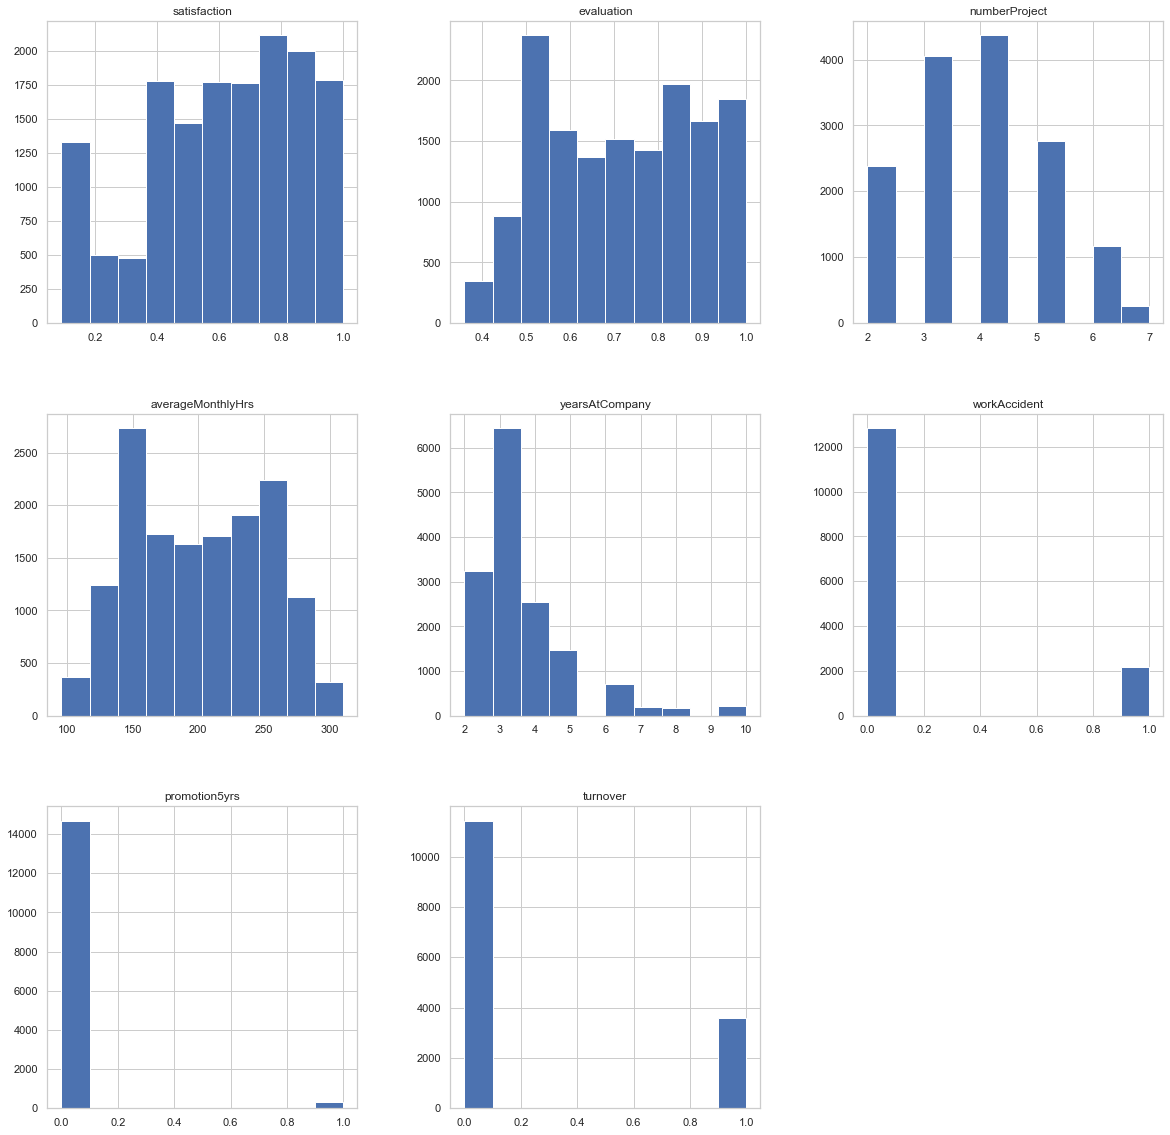

In [11]:
#distribution of each attribute
employee.hist(figsize=(20,20))
plt.show()

A few observations can be made based on the distributions from the above plots:

- Distribution of `satisfaction` attribute shows that most of the employees have more than 0.4 score compared to number of less satisfied employees.
- Distribution of `evaluation` tells us that majority of the employees have more than 0.5 score. However, there is a possbility to improve evaluation score by the company. 
- Vast minority of employees are promoted in the last five years.
- Few proportion of employees have faced accident at work.
- `Number of years spent` at the company is skewed to the right.
- `Average monthly hours and last evaluation` attrbiutes are bimodal.
- Employee who works less than 150 hours per month likely to have last evaluation score in the range between 0.50 and 0.60. Similarly, the one who works for long hours 260 hours have evalution score between 0.8 and 0.9.

### 2.2 Data cleaning

<a id="cleaning"></a>

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

#### Handling missing value

In [12]:
#check for missing values
employee.isnull().any()

satisfaction         False
evaluation           False
numberProject        False
averageMonthlyHrs    False
yearsAtCompany       False
workAccident         False
promotion5yrs        False
department           False
salary               False
turnover             False
dtype: bool

**No missing value** present in the dataframe.

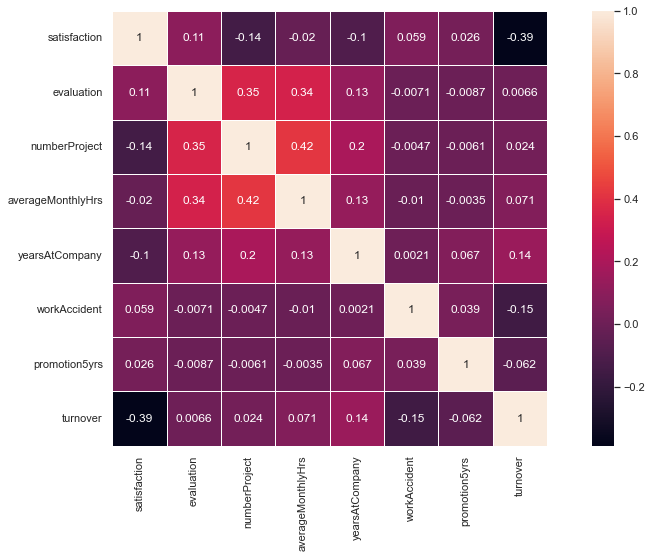

In [13]:
# Heatmap of employee_data
plt.figure(figsize = (16, 8))
sns.heatmap(employee.corr(), linewidths=.5, annot=True, square = True)
plt.show()

Heatmap above shows the relationships between numeric features. In our case, data is not highly correlated, which is good because it means we likely won't have issues with multicollinearity later.

- The correlation value for two columns can be between -1 and +1.   The closer the value is to either -1 or +1, the higher the correlation or association between columns.  If the correlation value is positive, it means that the when one column gets bigger the other column gets bigger.  When the correlation value is negative, this means that when one column gets bigger the other column gets smaller.
- From the heatmap, `satisfaction level and work accident` attributes are negatively correlated with `turnover` column. This tells us that decrease in satisfaction level, increases the chance of leaving the company. Also, when there is a increase in number of years spent at the company, there is an increase in the chance of leaving the company.
- `numberProject and averageMontlyHrs` have the highest positive correlation in the matrix.

### 2.3 Exploring data

<a id="pictures"></a>

#### 2.3.1 Frequency of employees in each department

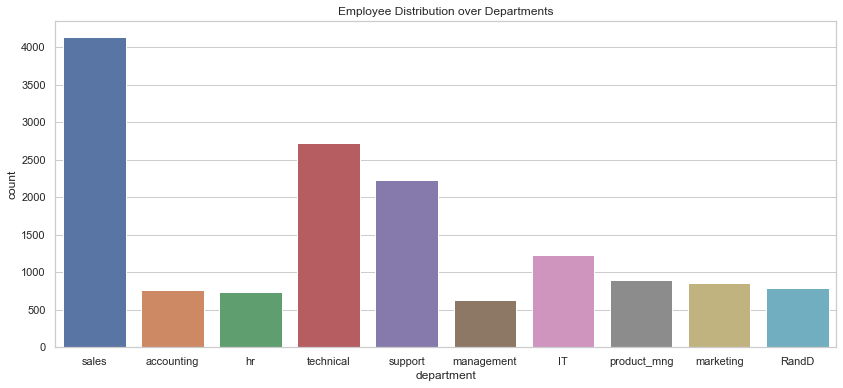

In [14]:
# Number of employees per Department

plt.subplots(figsize=(14, 6))
sns.countplot(x="department",data=employee).set_title('Employee Distribution over Departments')
plt.show()

Top three deparments with the highest number of employees in the decreasing order are `sales`, `technical`, and `support`.

#### 2.3.2 Satisfaction level vs Department

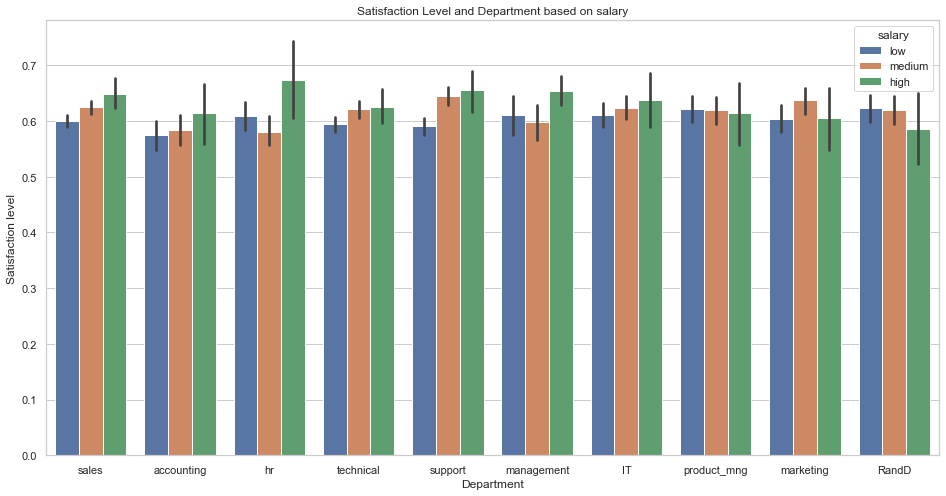

In [15]:
#grouped bar chart of satisfaction level and department based on salary

plt.figure(figsize = (16, 8))
sns.barplot(x = 'department', y = 'satisfaction', hue='salary',
            data = employee)
plt.title('Satisfaction Level and Department based on salary')
plt.xlabel('Department')
plt.ylabel('Satisfaction level')
plt.show()

Mostly, employee with higher salaries attained more satisfaction level score.

#### 2.3.3 Last Evaluation vs Department

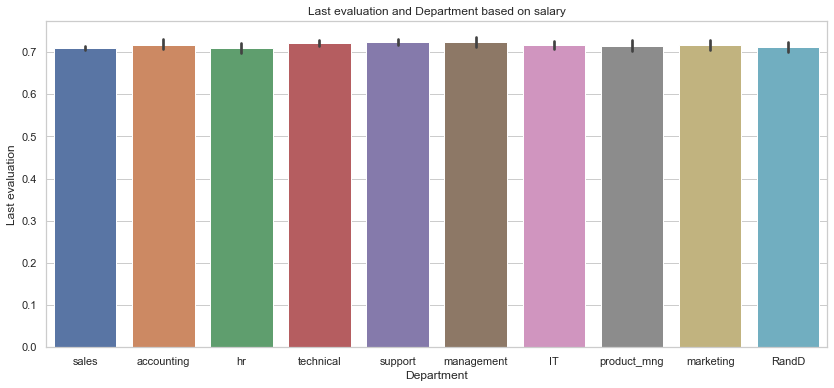

In [16]:
#bar chart of last evaluation and department columns

plt.figure(figsize = (14, 6))
sns.barplot(x = 'department', y = 'evaluation',
            data = employee)
plt.title('Last evaluation and Department based on salary')
plt.xlabel('Department')
plt.ylabel('Last evaluation')
plt.show()

Looks like last evaluation is almost the same across the departments. The average last evaluation score for all the departments is **0.7161**. There are five departments which have last evaluation score lower than the **0.7161** are `RandD, Hr, Marketing, product management and sales`. 

#### 2.3.4 Distribution of salaries across departments

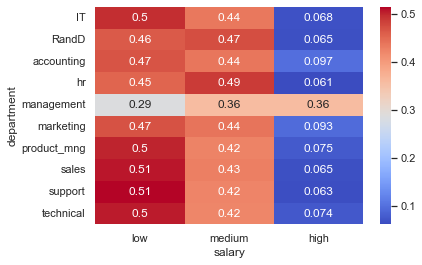

In [17]:
#salary_proportion dataframe is created to store values
salary_proportion = pd.crosstab([employee.department], employee.salary)
salary_proportion['total'] = salary_proportion['low'] + salary_proportion['medium'] + salary_proportion['high']

#salary proportions are calculated for a given department
salary_proportion['low'] = round(salary_proportion['low']/salary_proportion['total'], 4)
salary_proportion['medium'] = round(salary_proportion['medium']/salary_proportion['total'], 4)
salary_proportion['high'] = round(salary_proportion['high']/salary_proportion['total'], 4)

#rearrange columns (low, medium, high)
salary_proportion = salary_proportion[['low', 'medium', 'high']]

#heatmap is plotted to do analysis
sns.heatmap(salary_proportion, annot=True, cmap="coolwarm")
plt.show()

As we can see from the above figure, distribution of salary in `management department` is amost evenly spread out. In the other departments, there is a significant difference between low and high salary pay.

It would be interesting to explore the trend between department and promotion in the last 5 years. In order to achieve this, **I have decided to include only employees who working currently with the company.**

#### 2.3.5 promotion in the last 5 years and department

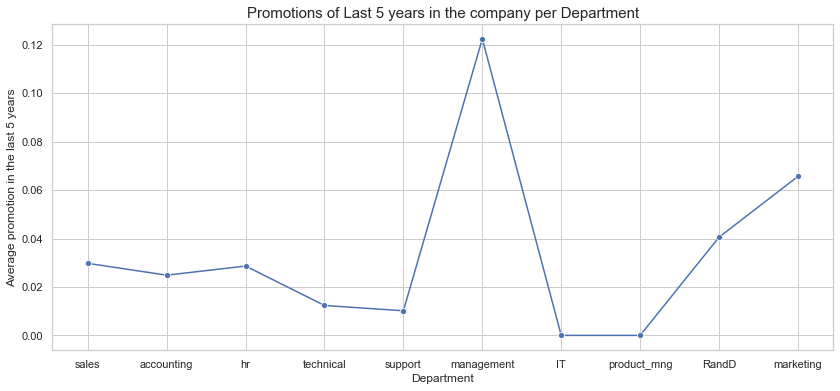

In [18]:
#promotion in the last five years for existing employees(left = 0) in each department

plt.figure(figsize = (14, 6))
sns.lineplot(x='department', y='promotion5yrs', data=employee[employee.turnover == 0], ci=None, marker='o')
plt.title("Promotions of Last 5 years in the company per Department", size=15)
plt.xlabel('Department')
plt.ylabel('Average promotion in the last 5 years')
plt.show()

- Management and marketing departments have more average promotions in the last 5 years.
- IT and product management departments have the lowest promotions scores.

### 2.4 Visualising data

<a id="question" ></a>
This section discusses the insights in the form of visualisation. The primary objective of this section is to understand the factors which related to employees who left the company and stayed in the company.

#### 2.4.1: Analysis of Turnover on the basis of satisfaction

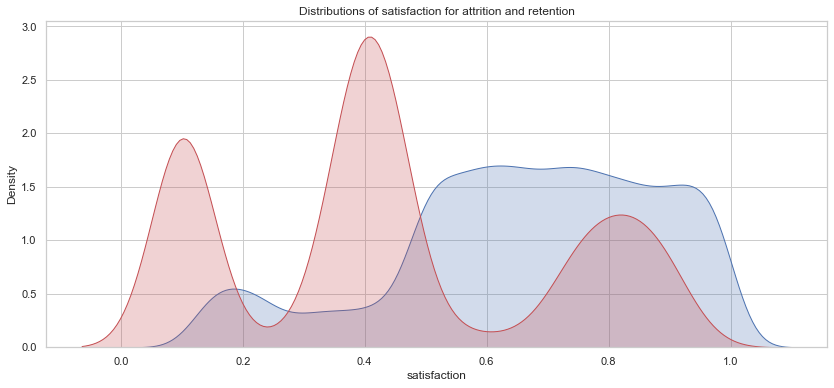

In [19]:
#distribution plot of satisfaction and turnover
plt.figure(figsize=(14,6))
sns.kdeplot(employee.loc[(employee.turnover == 0),'satisfaction'] , color='b',shade=True, label='attrition')
sns.kdeplot(employee.loc[(employee.turnover == 1),'satisfaction'] , color='r',shade=True, label='retention')
plt.title('Distributions of satisfaction for attrition and retention')
plt.show()

In the red distribution, there are three types of satisfaction levels are involved:
- Employees with satisfaction scores **less than 0.2, between 0.25 and 0.6, and more than 0.65 have left the company**.

The blue distribution represents employees who stays with the company. From the plot, we can say that most of the employees staying in the company have more than **0.5 satisfaction score**. 

#### Do satisfaction scores of employees who leave the company differ significantly from the employees who don't?

In [20]:

# T-test to check dependency of smoking on charges
H0 = "Satisfaction scores of attrition and retention are same"   # Stating the Null Hypothesis
H1 = "Satisfaction scores of attrition and retention are not the same"   # Stating the Alternate Hypothesis

x = np.array(employee[employee.turnover == 0].satisfaction)  # Selecting satisfaction scores corresponding to retention as an array
y = np.array(employee[employee.turnover == 1].satisfaction) # Selecting satisfaction scores corresponding to attrition as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{H0} as the p_value ({p_value}) < 0.05')
else:
    print(f'{H1} as the p_value ({p_value}) > 0.05')

Satisfaction scores of attrition and retention are same as the p_value (0.0) < 0.05


`p_value is less than 0.05, so we reject the null hypothesis.` This means satisfaction scores of employees who leave the company are significantly different from the one who stays with the company.

#### 2.4.2: Analysis of Turnover on the basis of evaluation

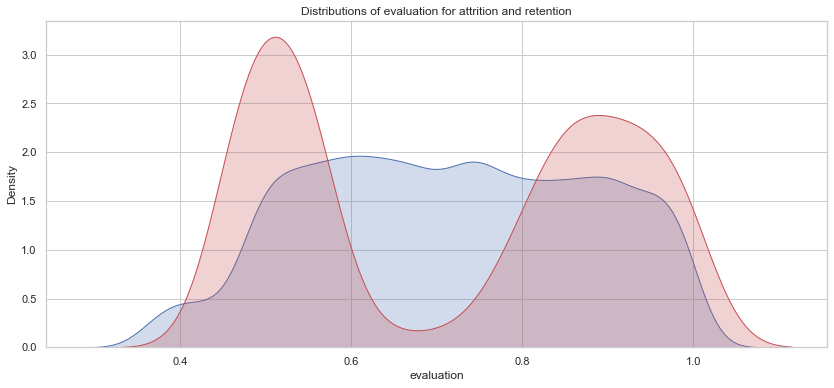

In [21]:
#distribution plot of evaluation and turnover
plt.figure(figsize=(14,6))
sns.kdeplot(employee.loc[(employee.turnover == 0),'evaluation'] , color='b',shade=True, label='attrition')
sns.kdeplot(employee.loc[(employee.turnover == 1),'evaluation'] , color='r',shade=True, label='retention')
plt.title('Distributions of evaluation for attrition and retention')
plt.show()

It is interesting to see that majority of the employees with evaluation score between 0.6 and 0.8 tend to stay with the company.

#### 2.4.3: Analysis of Turnover on the basis of department

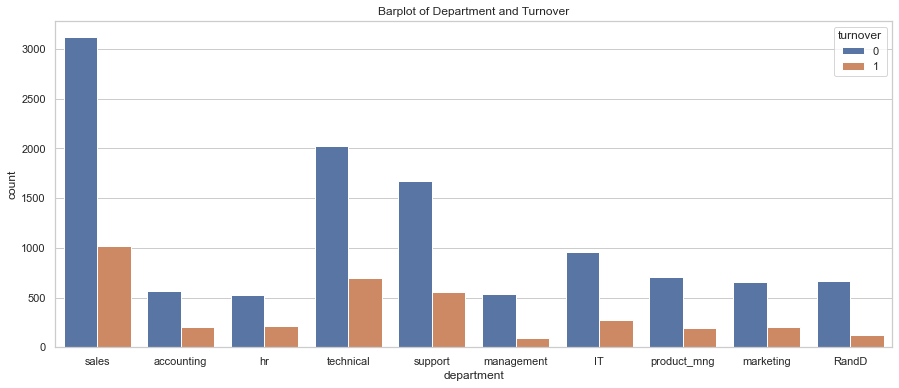

In [22]:
#barplot of department and turnover
plt.figure(figsize = (15, 6))
sns.countplot(x = 'department', data = employee, hue = 'turnover')
plt.title('Barplot of Department and Turnover')
plt.show()

Top three deparments with the highest number of employees who left the company in the decreasing order are `sales`, `technical`, and `support`.

#### 2.4.4: Analysis of Turnover on the basis of salary

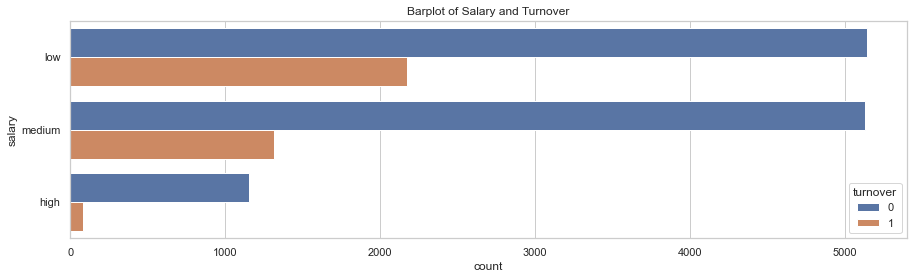

In [23]:
#barplot of salary and turnover
plt.figure(figsize = (15, 4))
sns.countplot(y = 'salary', data = employee, hue = 'turnover')
plt.title('Barplot of Salary and Turnover')
plt.show()

Most of the employees who left the company have **low or medium salary**.

#### 2.4.5: Analysis of Turnover on the basis of number of projects involved in a year

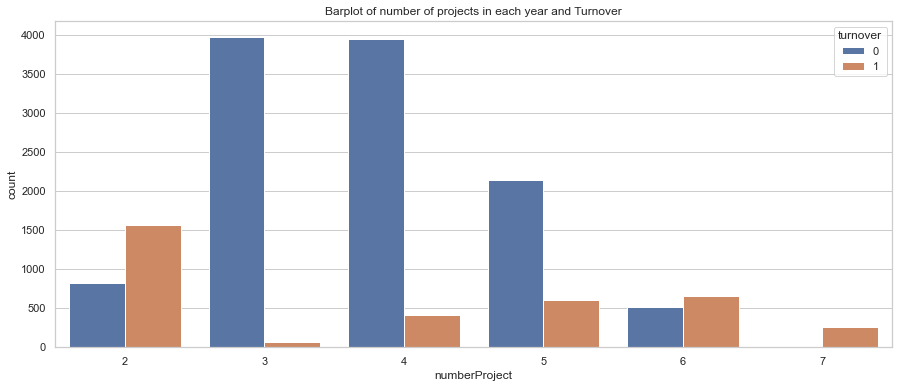

In [24]:
#barplot of number of projects each year and turnover
plt.figure(figsize = (15, 6))
sns.countplot(x = 'numberProject', data = employee, hue = 'turnover')
plt.title('Barplot of number of projects in each year and Turnover')
plt.show()

- Employees stay in the company typically have about 3 to 5 projects.
- Attrition rate increases with number of projects. Also, more number of employees who left the company had 2 projects.

#### 2.4.6: Analysis of Turnover on the basis of average monthly hours

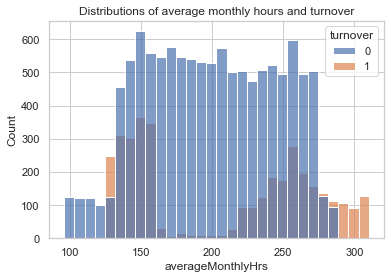

In [25]:
#distributions of average montly hours and turnover
sns.histplot(data = employee,x = 'averageMonthlyHrs' ,alpha = .7,hue = 'turnover')
plt.title('Distributions of average monthly hours and turnover')
plt.show()

Most of the employees who left the company have average monthly hours `either less than 160 hours or more than 250 hours`.

#### Do average montly hours of employees who leave the company differ significantly from the employees who don't?

In [26]:

# T-test to check dependency of smoking on charges
H0 = "Average monthly hours of attrition and retention are same"   # Stating the Null Hypothesis
H1 = "Average monthly hours of attrition and retention are not the same"   # Stating the Alternate Hypothesis

x = np.array(employee[employee.turnover == 0].averageMonthlyHrs)  # Selecting average montly hours corresponding to retention as an array
y = np.array(employee[employee.turnover == 1].averageMonthlyHrs) # Selecting average montly hours corresponding to attrition as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{H0} as the p_value ({p_value}) < 0.05')
else:
    print(f'{H1} as the p_value ({p_value}) > 0.05')

Average monthly hours of attrition and retention are same as the p_value (2.3113035567540143e-18) < 0.05


`p_value is less than 0.05, so we reject the null hypothesis`. This means average monthly score of employees who leave the company are significantly different from the one who stays with the company.

#### Is the distributions of average monthly hours for employees who stays in the company with low salary, medium salary and high salary, the same ?

In [27]:
# Test to see if the distributions of average monthly hours for employees who stays in the company having different salary types, are significantly different

H0 = "Types of salary type of retention employees has no effect on average monthly hours"   # Stating the Null Hypothesis
H1 = "Types of salary type of retention employees has effect on average monthly hours"   # Stating the Alternate Hypothesis

#dataframe of employees who stays in the company
avg_df = employee[employee.turnover == 0]

low = employee[employee.salary == 'low'].averageMonthlyHrs
medium = employee[employee.salary == 'medium'].averageMonthlyHrs
high = employee[employee.salary == 'high'].averageMonthlyHrs


f_stat, p_value = stats.f_oneway(low, medium, high)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{H1} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value.round(3)}) > 0.05')

Types of salary type of retention employees has no effect on average monthly hours as the p_value (0.632) > 0.05


`p_value is greater than 0.05, so we accept the null hypothesis`. This means salary type (low, medium, high) for employees who stays with the company has no effect on average monthly hours.

#### 2.4.7: Distribution of employee retention and work accident

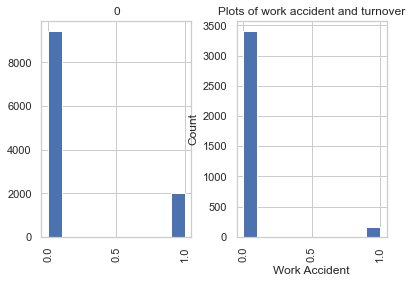

In [28]:
employee.workAccident.hist(by = employee.turnover)
plt.title('Plots of work accident and turnover', loc='center')
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.show()

Work accident of employees who stays in the company is about `9%` higher than the work accident for employees who left the company.

#### 2.4.8: Analysis of number of project on the basis of their average monthly hours

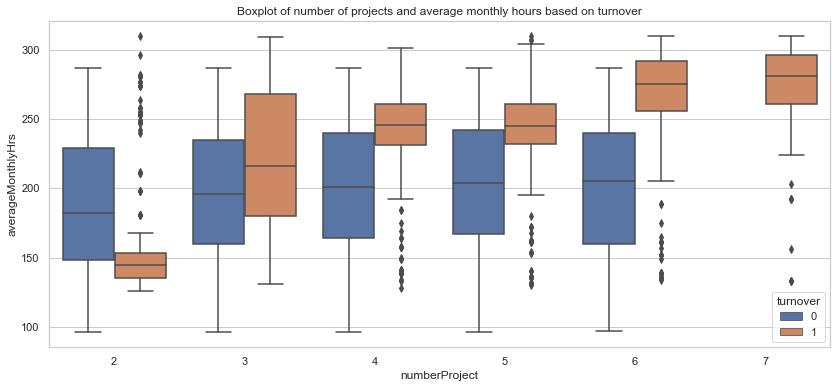

In [29]:
#boxplot of Number of project and average monthly hours based on turnover

plt.figure(figsize = (14, 6))
sns.boxplot(y = 'averageMonthlyHrs', x = 'numberProject', data=employee, hue='turnover')
plt.title('Boxplot of number of projects and average monthly hours based on turnover')
plt.show()

- Medians of average monthly hours of different number of projects are almost consistent for employees who stay with the company.
- For the employees who left the company, there is an increase in average monthly hours with rise in number of projects.

#### 2.4.9: Analysis of turnover on the basis of their satisfaction level

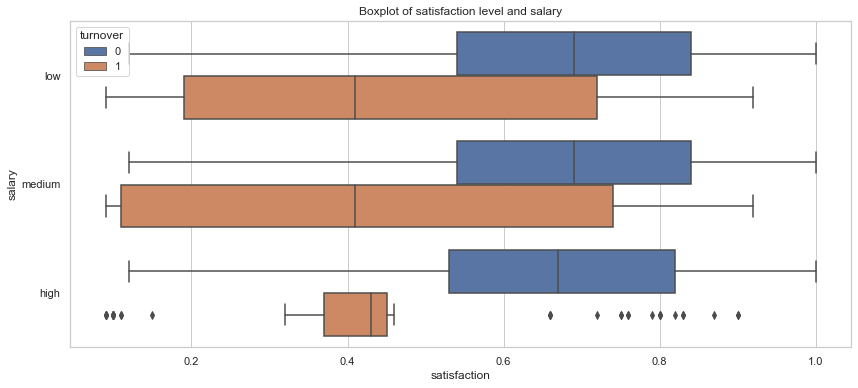

In [30]:
#boxplot of Satisfaction level and Salary

plt.figure(figsize = (14, 6))
sns.boxplot(x = 'satisfaction', y = 'salary', data=employee,
            hue = 'turnover')
plt.title('Boxplot of satisfaction level and salary')
plt.show()

Average satisfaction of the employees who left the company is lower than the one who haven't

#### 2.4.10: Analysis of time spend in years on the basis of their salary

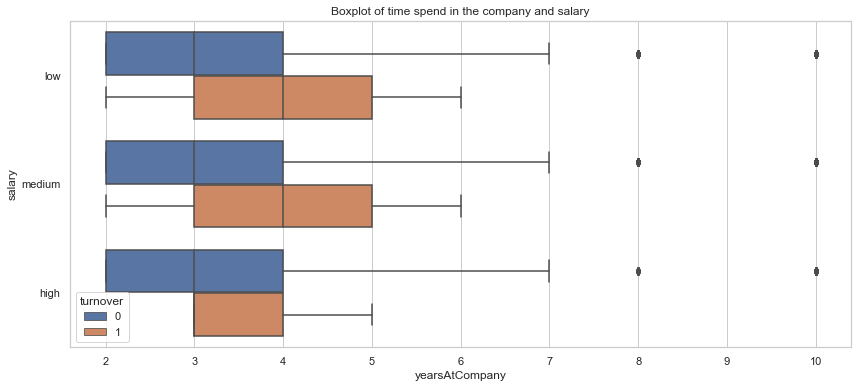

In [31]:
#boxplot of time spend in the company and Salary

plt.figure(figsize = (14, 6))
sns.boxplot(x = 'yearsAtCompany', y = 'salary', data=employee,
            hue = 'turnover')
plt.title('Boxplot of time spend in the company and salary')
plt.show()

Employees leaving are more experienced (i.e. higher time spent in company on average) in the low and medium salary class.

#### 2.4.11: Analysis of average monthly hours on the basis of their salary

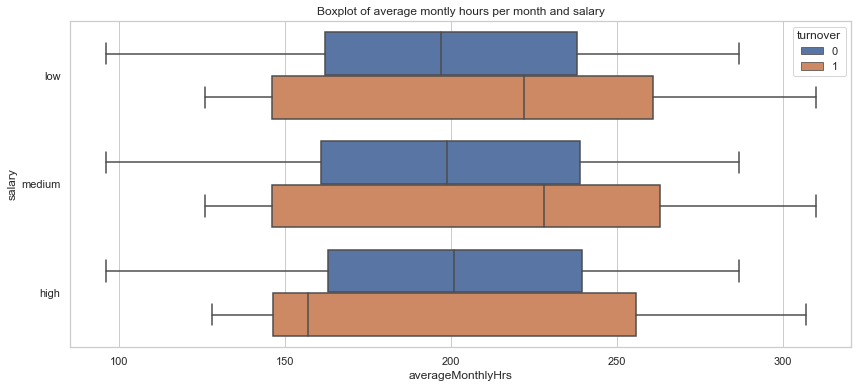

In [32]:
#boxplot of average montly hours per month and salary

plt.figure(figsize = (14, 6))
sns.boxplot(x = 'averageMonthlyHrs', y = 'salary', data=employee, hue='turnover')
plt.title('Boxplot of average montly hours per month and salary')
plt.show()

From the above plot, average satisfaction of the employees who left is lower than who haven’t left

#### 2.4.12: Scatter plot of satisfaction and evaluation based on turnover

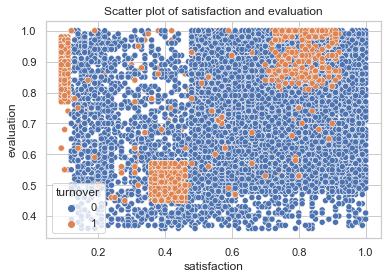

In [33]:
#scatter plot of satisfaction and evaluation
sns.scatterplot(x='satisfaction', y = 'evaluation', data=employee, hue='turnover')
plt.title('Scatter plot of satisfaction and evaluation')
plt.show()

As we can see from the above plot, there are 3 clusters for employees who left the company. Investigating these groups might reveal some hidden pattern. We will only consider points highlighted in **orange colour (turnover 1)**. Lets name them from left to right as `First, Second and Third clusters` respectively.

`First Cluster: `Employees in this cluster had satisfaction score more than 0.75 but low satisfaction score, which indicates that these employees were hard working but not happy with the job.

`Second Cluster: `Satisfaction score lies in the range between 0.35 and 0.45 with bad evaluation score less than 0.6. This tells us that these employees were neither satisfied nor performed well with their jobs.

`Third Cluster: `This cluster has the highest satisfaction and evaluation scores, which are both greater than 0.7. Employees at this group perfomed well and enjoyed working in the company.

#### 2.4.13: Analysis of number of project on the basis of their evaluation

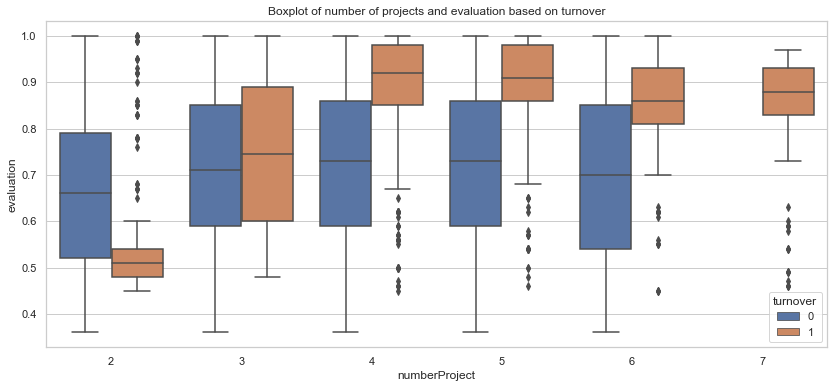

In [34]:
#boxplot of Number of projects and evaluation

plt.figure(figsize = (14, 6))
sns.boxplot(y = 'evaluation', x = 'numberProject', data=employee, hue='turnover')
plt.title('Boxplot of number of projects and evaluation based on turnover')
plt.show()

- There is an increase in evaluation when the number of project increases for the employees who left the job.
- Consistent trend in the evaluation score for current employees.

## 3: Important Points

<a id="insights" ></a>
This section consists of some key findings found in the EDA process.

- If an employee has not been promoted in the last five years, there is a larger likelihood that they may leave the company. Similarly, if an employee is dissatisfied with their employer, they are more likely to leave.
- Employees who have been with the company for a longer period of time are more likely to resign. If an employee's last evaluation falls short of his or her expectations, attrition is more likely.
- According to research, Employees that earn a low to medium salary are more likely to leave. Employees with high incomes are less likely to leave the company.
- Employee turnover is high in the sales, technical, and support sectors. Employee turnover is lowest in the management department.
- Employees with 2, 6, and 7 projects have a significant turnover rate. The majority of workers who worked on 3,4,5 projects stayed with the company. The individuals that worked on the seven projects all left the business.
- Employees who worked less hours (150 hours or less) departed the company more frequently. Employees that worked too many hours (250 or more) were fired. Employees that quit were usually under or overworked.
- Employees with extremely low levels of satisfaction (0.2 or below) were more likely to leave the organisation. Employees with low levels of satisfaction (0.30.5) were more likely to leave the organisation. Employees with extremely high levels of satisfaction (0.7 or above) were more likely to leave the organisation.

# Who are the most valuable employee? <br>
Employees with an evaluation score of >=0.72, more than or equal to 3 years of experience in the company, and more than 4 projects can be regarded experienced and beneficial for a company based on the work covered in the notebook. This accounts for more than half of the employees left.